# Data inspection pipeline

In [1]:
import numpy as np, glob
import matplotlib.pyplot as pl
%matplotlib inline

Enter the path to the folder in which the data files are stored: ./data_1/*
Working on file number 1 : ./data_1/1756.npz


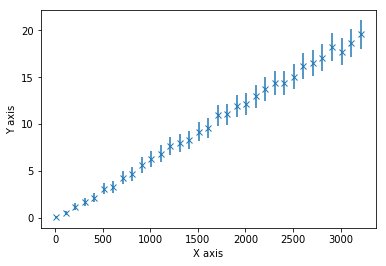

Does that look OK?y
Working on file number 2 : ./data_1/0737.npz


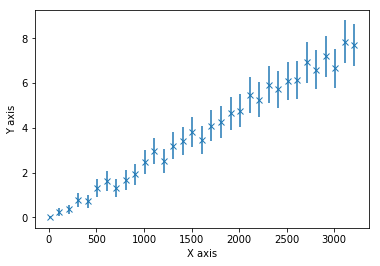

Does that look OK?y
Working on file number 3 : ./data_1/1102.npz


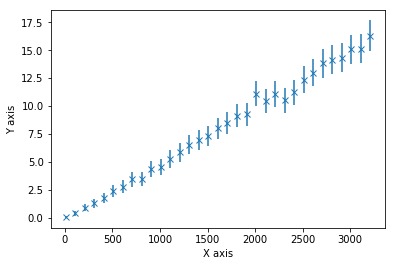

Does that look OK?y
Working on file number 4 : ./data_1/1534.npz


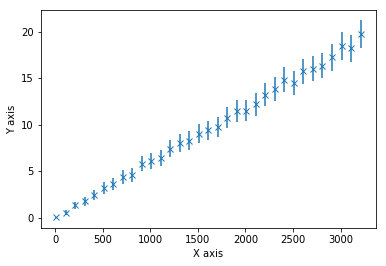

Does that look OK?y


In [7]:
path_to_data = input("Enter the path to the folder in which the data files are stored: ")
#path_to_data = "./data_1/*"

data_files = glob.glob(path_to_data)

for ii, path in enumerate(data_files):
    
    print("Working on file number {} : {}".format(ii + 1, path))
    
    data = np.load(path)
    x_axis = data['arr_0']
    y_axis = data['arr_1']
    y_err = data['arr_2']
    
    pl.errorbar(x_axis, y_axis, yerr = y_err, fmt = 'x')
    
    pl.xlabel("X axis")
    pl.ylabel("Y axis")
    
    pl.show()
    
    user_resp = input("Does that look OK?")
    
    if user_resp in ['yes', 'Yes', 'y', 'Y', 'YES']:
        continue
    else:
        print("Breaking out of loop at file number {} and file {}".format(ii + 1, path))
        break
        

## Fitting data 

That was all fun and good, but we usually want to do something to the data and then check if our actions on the data produce the results that we were expecting. The above script can be easily modified to do this.

As an example, let's fit a line to the data that we are reading in and check the results.

To do this, we will use `SciPy`'s `curve_fit` function

In [8]:
from scipy.optimize import curve_fit

In [9]:
def line(x, slope, intercept):
    return slope * x + intercept

Enter the path to the folder in which the data files are stored: ./data_1/*
Working on file number 1 : ./data_1/1756.npz
The best fit slope is 0.00609 and intercept is -0.03503
The error on the slope is 0.0001247 and that on intercept is 0.0748069


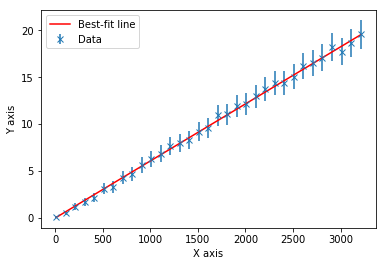

Does that look OK?y
Working on file number 2 : ./data_1/0737.npz
The best fit slope is 0.00239 and intercept is -0.01936
The error on the slope is 0.0000773 and that on intercept is 0.0431384


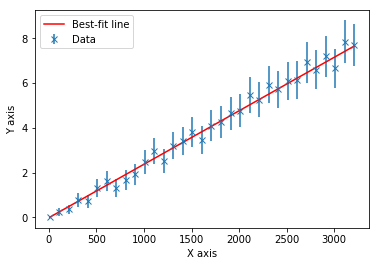

Does that look OK?y
Working on file number 3 : ./data_1/1102.npz
The best fit slope is 0.00492 and intercept is -0.04030
The error on the slope is 0.0001124 and that on intercept is 0.0683069


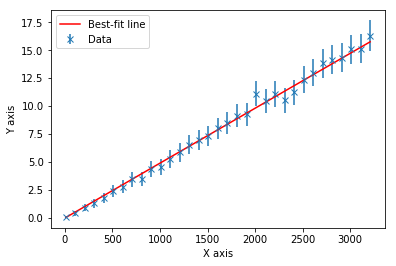

Does that look OK?y
Working on file number 4 : ./data_1/1534.npz
The best fit slope is 0.00595 and intercept is -0.02166
The error on the slope is 0.0001211 and that on intercept is 0.0644622


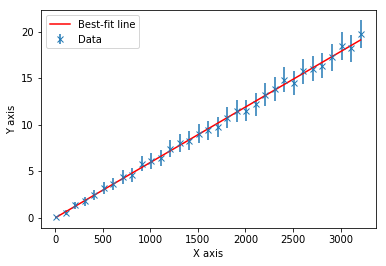

Does that look OK?y


In [17]:
path_to_data = input("Enter the path to the folder in which the data files are stored: ")
#path_to_data = "./data_1/*"

data_files = glob.glob(path_to_data)

for ii, path in enumerate(data_files):
    
    print("Working on file number {} : {}".format(ii + 1, path))
    
    data = np.load(path)
    x_axis = data['arr_0']
    y_axis = data['arr_1']
    y_err = data['arr_2']
    
    popt, pconv = curve_fit(line, x_axis, y_axis, sigma = y_err, absolute_sigma = True)
    
    errors = np.sqrt(np.diag(pconv))
    
    print("The best fit slope is {:.5f} and intercept is {:.5f}".format(popt[0], popt[1]))
    print("The error on the slope is {:.7f} and that on intercept is {:.7f}".format(errors[0], errors[1]))
    
    sim_x = x_axis
    sim_y = line(x_axis, popt[0], popt[1])
    
    pl.errorbar(x_axis, y_axis, yerr = y_err, fmt = 'x', label = 'Data')
    pl.plot(sim_x, sim_y, color = 'r', label = 'Best-fit line')
    
    pl.xlabel("X axis")
    pl.ylabel("Y axis")
    
    pl.legend(loc = 'best')
    pl.show()
    
    user_resp = input("Does that look OK?")
    
    if user_resp in ['yes', 'Yes', 'y', 'Y', 'YES']:
        continue
    else:
        print("Breaking out of loop at file number {} and file {}".format(ii + 1, path))
        break
        

### _Advanced Problem_

Modify the above script to check the residuals (y_data - fit_data) after the fitting a line and then check the residual plots to determine the quality of the fit